In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
plt.close("all")

COLUMNS_NOTAS = ['name', 'Resultado', 'Notas Prova', 'Notas Workings', 'Nota Final']
COLUMNS_INSCRITOS = ['name', 'cidade', 'sabe programar', 'escolaridade', 'genero']
PCT = 0.05

def organize_notas(df):
    df.columns =df.iloc[1] 

    notas =df.loc[2:, COLUMNS_NOTAS]
    notas.columns = COLUMNS_NOTAS
    notas = notas.reset_index(drop=True)

    return notas

notas_bruto_v = pd.read_csv("notas_vespertino.csv")
notas_bruto_m = pd.read_csv("notas_matutino.csv")
inscritos_bruto = pd.read_csv("inscritos.csv")

notas_m = organize_notas(notas_bruto_m)
notas_v = organize_notas(notas_bruto_v)

notas = pd.concat([notas_m, notas_v], ignore_index=True)

inscritos = inscritos_bruto.loc[:, COLUMNS_INSCRITOS]

inscritos.name = inscritos.name.str.lower()
notas.name = notas.name.str.lower()
notas_m.name = notas_m.name.str.lower()
notas_v.name = notas_v.name.str.lower()

geral = pd.merge(notas, inscritos, left_on='name', right_on='name')
matutino = pd.merge(notas_m, inscritos, left_on='name', right_on='name')
vespertino = pd.merge(notas_v, inscritos, left_on='name', right_on='name')
aprovados = geral.loc[geral['Resultado'] == 'APROVADO']

#not_merged = notas_m.loc[~notas_m.name.isin(matutino.name)]



In [ ]:
#Sabe programar

analise = analisa(aprovados, 'sabe programar', PCT)
analise.plot.pie(autopct='%1.1f%%')

In [ ]:
#Aprovados em relação a se sabiam  programar

sabiam_programar = geral.loc[geral['sabe programar'] == True]
analise = analisa(sabiam_programar, 'Resultado', PCT, nome='sabiam programar')
analise.plot.pie(autopct='%1.1f%%')


In [ ]:
#Cidade

analise = analisa(geral, 'cidade', PCT, False)
analise.plot.pie(autopct='%1.1f%%')


In [ ]:
#Escolaridade

analise = analisa(aprovados, 'escolaridade', PCT, False)
analise.plot.pie(autopct='%1.1f%%')

In [ ]:
#Aprovados

analise = analisa(vespertino, 'Resultado', PCT)
analise.plot.pie(autopct='%1.1f%%')

In [ ]:
#Genero

analise = analisa(aprovados, 'genero', PCT)
analise.plot.pie(autopct='%1.1f%%')

In [ ]:
#Mulheres Aprovadas

mulheres = geral.loc[geral.genero == 'female']
analise = analisa(mulheres, 'Resultado', PCT, nome='mulheres')
analise.plot.pie(autopct='%1.1f%%')

Perfil dos alunos do introcomp: adolescentes do gênero masculino (68.9%), moram em Vitória (27.8%), estão no 3º ano do Ensino Médio (43.3%) e não sabem programar (66.7%)

Perfil dos aprovados: adolescentes do gênero masculino (73.9%), moram na Serra (26.1%), estão no 3º ano do Ensino Médio (39.1%) e não sabem programar (54.3%)

In [120]:
geral['Nota Final'] = geral['Nota Final'].map(lambda p: p.replace(',', '.'))
geral['Nota Final'] = geral['Nota Final'].astype(float)

<Axes: xlabel='cidade'>

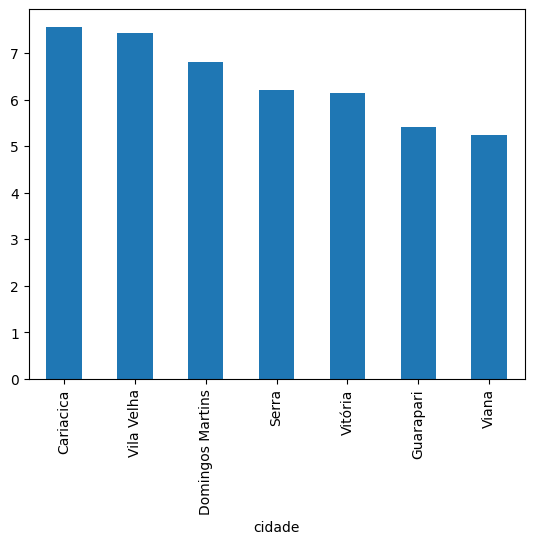

In [127]:

analise = geral.loc[geral['Nota Final'] != 0]
analise = analise.groupby('cidade')['Nota Final'].mean()
analise = analise.sort_values(ascending=False)
analise.plot.bar()
